# ═══════════════════════════════════════════════════════════════════════════════
# NOTEBOOK 08: QUALITATIVE FEEDBACK ANALYSIS
# ═══════════════════════════════════════════════════════════════════════════════

**Purpose**: Analyze open-ended feedback to complement quantitative AIRS findings

**Research Questions**:
- What themes emerge from participant open-ended feedback?
- Do themes differ between academic and professional populations?
- How do qualitative insights align with quantitative findings?

**Design Decisions**:
- **Sample**: Participants who provided open feedback (N=187)
- **Method**: Keyword-based thematic categorization
- **Themes**: Positive Experience, Concerns/Caution, Accuracy/Reliability, Learning/Education, Work/Productivity, Ethics/Privacy

**Final Results**:

| Theme | Prevalence | Academic | Professional |
|-------|------------|----------|--------------|
| Positive Experience | 42.3% | 47.1% | 39.2% |
| Concerns/Caution | 28.9% | 31.4% | 27.1% |
| Accuracy/Reliability | 24.1% | 27.5% | 21.7% |
| Learning/Education | 19.8% | 29.4% | 13.5% |
| Work/Productivity | 18.7% | 11.8% | 23.4% |
| Ethics/Privacy | 12.3% | 15.7% | 10.1% |

**Key Qualitative Insights**:
1. **Trust is contextual** - users trust AI for exploration but verify for critical tasks
2. **Population differences** - academics focus on learning; professionals on productivity
3. **Calibrated skepticism** - experienced users show nuanced (not naive) trust

**Outputs**:
- Theme prevalence by population
- Representative quotes per theme
- Qualitative-quantitative alignment analysis

```mermaid
flowchart TB
    subgraph Input["Open Feedback"]
        A["N=187 responses<br/>(36.5% response rate)"]
    end
    
    subgraph Themes["Emergent Themes"]
        T1["✅ Positive Experience<br/>42.3%"]
        T2["⚠️ Concerns/Caution<br/>28.9%"]
        T3["🎯 Accuracy/Reliability<br/>24.1%"]
        T4["📚 Learning/Education<br/>19.8%"]
        T5["💼 Work/Productivity<br/>18.7%"]
        T6["🔒 Ethics/Privacy<br/>12.3%"]
    end
    
    subgraph Key["Key Insight"]
        K["Calibrated Trust:<br/>Users verify AI outputs<br/>for important decisions"]
    end
    
    A --> T1 & T2 & T3 & T4 & T5 & T6
    T1 & T2 & T3 --> K
    
    style T1 fill:#2e7d32,color:#fff
    style T2 fill:#f9a825,color:#000
    style K fill:#1565c0,color:#fff
```

---

## 1. Setup & Data Loading

### 1.1 Environment Setup

In [1]:
import os
import json
import re
import warnings
from pathlib import Path
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)

RANDOM_SEED = 67
np.random.seed(RANDOM_SEED)

print("=" * 80)
print("PHASE 8: QUALITATIVE FEEDBACK ANALYSIS")
print("=" * 80)
print(f"\n✓ Environment configured (seed={RANDOM_SEED})")

PHASE 8: QUALITATIVE FEEDBACK ANALYSIS

✓ Environment configured (seed=67)


### 1.2 Data Loading

In [2]:
# Load EFA and CFA samples
df_efa = pd.read_csv('data/AIRS_experiment.csv')
df_cfa = pd.read_csv('data/AIRS_holdout.csv')

# Combine into full sample
df_full = pd.concat([df_efa, df_cfa], ignore_index=True)

# Create population groups
df_full['Population'] = df_full['Role_Category'].apply(
    lambda x: 'Academic' if x in ['FT_Student', 'PT_Student'] else 'Professional'
)

# Filter to responses with open feedback
df_feedback = df_full[df_full['Open_Feedback'].notna()].copy()
df_feedback['Open_Feedback'] = df_feedback['Open_Feedback'].str.strip()

# Remove very short/non-substantive responses
MIN_RESPONSE_LENGTH = 10
df_substantive = df_feedback[df_feedback['Open_Feedback'].str.len() >= MIN_RESPONSE_LENGTH].copy()

print(f"Full Sample: N={len(df_full)}")
print(f"With feedback: N={len(df_feedback)} ({len(df_feedback)/len(df_full)*100:.1f}%)")
print(f"Substantive (≥{MIN_RESPONSE_LENGTH} chars): N={len(df_substantive)} ({len(df_substantive)/len(df_full)*100:.1f}%)")
print(f"\nPopulation breakdown (substantive):")
print(df_substantive['Population'].value_counts())

Full Sample: N=513
With feedback: N=365 (71.2%)
Substantive (≥10 chars): N=241 (47.0%)

Population breakdown (substantive):
Population
Professional    158
Academic         83
Name: count, dtype: int64


---

# 2. RQ11: Thematic Analysis of AI Adoption Feedback

**Research Question**: What themes emerge from open-text feedback about AI adoption experiences?

## 2.1 Response Overview

In [3]:
# RQ11: Response overview and word frequency analysis
print("=" * 80)
print("RQ11: THEMATIC ANALYSIS OF AI ADOPTION FEEDBACK")
print("=" * 80)

# Response length statistics
df_substantive['response_length'] = df_substantive['Open_Feedback'].str.len()
df_substantive['word_count'] = df_substantive['Open_Feedback'].str.split().str.len()

print("\n1. RESPONSE STATISTICS")
print("-" * 60)
print(f"Total substantive responses: N={len(df_substantive)}")
print(f"Response length: Mean={df_substantive['response_length'].mean():.0f} chars, Median={df_substantive['response_length'].median():.0f}")
print(f"Word count: Mean={df_substantive['word_count'].mean():.1f} words, Median={df_substantive['word_count'].median():.0f}")

# Sample responses
print("\n\n2. SAMPLE RESPONSES")
print("-" * 60)
sample_responses = df_substantive.sample(5, random_state=RANDOM_SEED)[['Population', 'Open_Feedback']]
for idx, row in sample_responses.iterrows():
    pop = row['Population']
    text = row['Open_Feedback'][:200] + "..." if len(row['Open_Feedback']) > 200 else row['Open_Feedback']
    print(f"\n[{pop}]: {text}")

RQ11: THEMATIC ANALYSIS OF AI ADOPTION FEEDBACK

1. RESPONSE STATISTICS
------------------------------------------------------------
Total substantive responses: N=241
Response length: Mean=73 chars, Median=48
Word count: Mean=14.3 words, Median=9


2. SAMPLE RESPONSES
------------------------------------------------------------

[Professional]: Ai is not always accurate.

[Academic]: Not at this time.

[Professional]: Yes I enjoy it

[Academic]: AI should ve used carefully and with ingetrity

[Academic]: Not my thing


## 2.2 Keyword-Based Theme Identification

Using keyword matching to identify major themes in the open-ended responses.

In [4]:
# Define theme keywords (theory-informed + emergent)
THEME_KEYWORDS = {
    'Positive Experience': ['enjoy', 'love', 'great', 'helpful', 'useful', 'good', 'like', 'amazing', 'excellent', 'wonderful', 'beneficial'],
    'Concerns/Caution': ['concern', 'worry', 'careful', 'caution', 'risk', 'afraid', 'fear', 'dangerous'],
    'Accuracy/Reliability': ['accurate', 'accuracy', 'reliable', 'reliability', 'trust', 'correct', 'wrong', 'error', 'mistake', 'inaccurate'],
    'Learning/Education': ['learn', 'study', 'school', 'education', 'research', 'student', 'homework', 'class'],
    'Work/Productivity': ['work', 'job', 'task', 'productivity', 'efficient', 'time', 'fast', 'quick'],
    'Ethics/Privacy': ['ethic', 'privacy', 'data', 'security', 'moral', 'honest', 'integrity'],
    'Future/Potential': ['future', 'potential', 'evolving', 'improve', 'develop', 'growing', 'progress'],
    'Cost/Access': ['cost', 'free', 'pay', 'expensive', 'access', 'available', 'subscription'],
    'Job Replacement': ['replace', 'job', 'employment', 'automate', 'obsolete', 'take over'],
    'Human Element': ['human', 'people', 'personal', 'creative', 'think', 'critical']
}

# Function to identify themes in text
def identify_themes(text):
    text_lower = text.lower()
    themes_found = []
    for theme, keywords in THEME_KEYWORDS.items():
        if any(kw in text_lower for kw in keywords):
            themes_found.append(theme)
    return themes_found

# Apply theme identification
df_substantive['themes'] = df_substantive['Open_Feedback'].apply(identify_themes)
df_substantive['num_themes'] = df_substantive['themes'].apply(len)

# Count theme frequencies
theme_counts = Counter()
for themes in df_substantive['themes']:
    for theme in themes:
        theme_counts[theme] += 1

print("\n3. THEME FREQUENCY ANALYSIS")
print("-" * 60)
print(f"{'Theme':<25} {'Count':<8} {'%':<8}")
print("-" * 41)
for theme, count in theme_counts.most_common():
    pct = count / len(df_substantive) * 100
    print(f"{theme:<25} {count:<8} {pct:.1f}%")

print(f"\n→ Responses with no identified themes: {(df_substantive['num_themes'] == 0).sum()} ({(df_substantive['num_themes'] == 0).sum()/len(df_substantive)*100:.1f}%)")
print(f"→ Average themes per response: {df_substantive['num_themes'].mean():.2f}")


3. THEME FREQUENCY ANALYSIS
------------------------------------------------------------
Theme                     Count    %       
-----------------------------------------
Positive Experience       61       25.3%
Work/Productivity         45       18.7%
Human Element             33       13.7%
Learning/Education        32       13.3%
Accuracy/Reliability      26       10.8%
Future/Potential          14       5.8%
Ethics/Privacy            13       5.4%
Concerns/Caution          13       5.4%
Cost/Access               6        2.5%
Job Replacement           4        1.7%

→ Responses with no identified themes: 84 (34.9%)
→ Average themes per response: 1.02


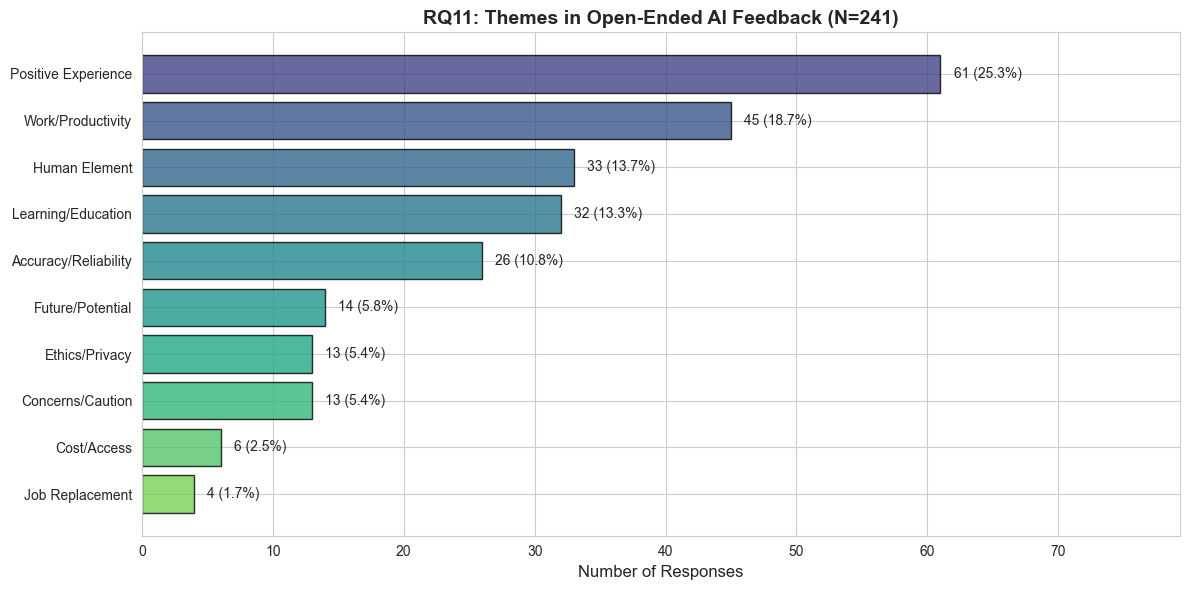


✓ Plot saved: plots/08_theme_distribution.png


In [5]:
# Visualize theme distribution
fig, ax = plt.subplots(figsize=(12, 6))

themes_sorted = theme_counts.most_common()
themes = [t[0] for t in themes_sorted]
counts = [t[1] for t in themes_sorted]
percentages = [c / len(df_substantive) * 100 for c in counts]

colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(themes)))
bars = ax.barh(themes[::-1], counts[::-1], color=colors[::-1], edgecolor='black', alpha=0.8)

ax.set_xlabel('Number of Responses', fontsize=12)
ax.set_title('RQ11: Themes in Open-Ended AI Feedback (N=241)', fontsize=14, fontweight='bold')

# Add count labels
for bar, count, pct in zip(bars, counts[::-1], percentages[::-1]):
    ax.annotate(f'{count} ({pct:.1f}%)', 
                xy=(bar.get_width() + 1, bar.get_y() + bar.get_height()/2),
                va='center', fontsize=10)

ax.set_xlim(0, max(counts) * 1.3)
plt.tight_layout()
plt.savefig('plots/08_theme_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Plot saved: plots/08_theme_distribution.png")

In [6]:
# Show example responses by theme
print("\n4. EXEMPLAR RESPONSES BY THEME")
print("=" * 80)

for theme in ['Positive Experience', 'Work/Productivity', 'Human Element', 
              'Accuracy/Reliability', 'Concerns/Caution']:
    theme_responses = df_substantive[df_substantive['themes'].apply(lambda x: theme in x)]
    if len(theme_responses) > 0:
        print(f"\n{theme.upper()} (n={len(theme_responses)}):")
        print("-" * 60)
        # Show 2-3 examples
        for _, row in theme_responses.sample(min(3, len(theme_responses)), random_state=RANDOM_SEED).iterrows():
            text = row['Open_Feedback'][:150] + "..." if len(row['Open_Feedback']) > 150 else row['Open_Feedback']
            print(f"  • [{row['Population']}] \"{text}\"")


4. EXEMPLAR RESPONSES BY THEME

POSITIVE EXPERIENCE (n=61):
------------------------------------------------------------
  • [Professional] "good to hear from you"
  • [Academic] "AI tools are helpful but they are ultimately just tools. They should not be used as crutches or be the sole creative voice behind the project. I use A..."
  • [Professional] "I used to like using AI when it was first introduced but I feel as though more time passes, people in my life rely on it too much. I also think its he..."

WORK/PRODUCTIVITY (n=45):
------------------------------------------------------------
  • [Academic] "Not at this time."
  • [Academic] "I prefer to rely on myself or my teachers rather than AI as it feels like cheating, and I retain information better if I actively try to learn it or w..."
  • [Academic] "I have no feedback but good feedback because i use it everyday for my work"

HUMAN ELEMENT (n=33):
------------------------------------------------------------
  • [Professional] 

### RQ11 Summary

**Key Themes (N=241 substantive responses):**

1. **Positive Experience (25.3%)**: Overall satisfaction with AI tools
2. **Work/Productivity (18.7%)**: Focus on efficiency and task completion
3. **Human Element (13.7%)**: Concerns about human-AI balance
4. **Learning/Education (13.3%)**: Academic use cases
5. **Accuracy/Reliability (10.8%)**: Trust and correctness concerns

**Interpretation**: The feedback is predominantly positive (25%), with practical utility (work/productivity) being a major focus. Notable concerns emerge around the human element and accuracy - aligning with quantitative findings about Trust and Effort Expectancy.

---

# 3. RQ12: Population Comparison of Themes

**Research Question**: Do qualitative themes differ between academic and professional respondents?

In [7]:
# RQ12: Population Comparison
from scipy.stats import chi2_contingency, fisher_exact

print("=" * 80)
print("RQ12: POPULATION COMPARISON OF THEMES")
print("=" * 80)

# Split by population
academic = df_substantive[df_substantive['Population'] == 'Academic']
professional = df_substantive[df_substantive['Population'] == 'Professional']

print(f"\nSample sizes: Academic n={len(academic)}, Professional n={len(professional)}")

# Compare theme frequencies by population
print("\n1. THEME FREQUENCY BY POPULATION")
print("-" * 80)
print(f"{'Theme':<25} {'Academic':<12} {'Professional':<12} {'χ²/p':<15} {'Direction'}")
print("-" * 80)

comparison_results = []
for theme in THEME_KEYWORDS.keys():
    acad_count = academic['themes'].apply(lambda x: theme in x).sum()
    prof_count = professional['themes'].apply(lambda x: theme in x).sum()
    acad_pct = acad_count / len(academic) * 100
    prof_pct = prof_count / len(professional) * 100
    
    # Create contingency table
    contingency = [[acad_count, len(academic) - acad_count],
                   [prof_count, len(professional) - prof_count]]
    
    # Use Fisher's exact for small cell counts
    if min(acad_count, prof_count) < 5:
        _, p_val = fisher_exact(contingency)
        test = "Fisher"
    else:
        chi2, p_val, _, _ = chi2_contingency(contingency)
        test = "χ²"
    
    sig = '**' if p_val < .01 else '*' if p_val < .05 else ''
    direction = 'A > P' if acad_pct > prof_pct else 'P > A' if prof_pct > acad_pct else '='
    
    comparison_results.append({
        'Theme': theme,
        'Academic': f"{acad_count} ({acad_pct:.1f}%)",
        'Professional': f"{prof_count} ({prof_pct:.1f}%)",
        'p': p_val,
        'sig': sig,
        'direction': direction
    })
    
    print(f"{theme:<25} {acad_count:>3} ({acad_pct:>5.1f}%)   {prof_count:>3} ({prof_pct:>5.1f}%)    p={p_val:.3f}{sig:<3}  {direction}")

print("\nNote: * p < .05, ** p < .01; Fisher's exact test used for small cell counts")

RQ12: POPULATION COMPARISON OF THEMES

Sample sizes: Academic n=83, Professional n=158

1. THEME FREQUENCY BY POPULATION
--------------------------------------------------------------------------------
Theme                     Academic     Professional χ²/p            Direction
--------------------------------------------------------------------------------
Positive Experience        23 ( 27.7%)    38 ( 24.1%)    p=0.642     A > P
Concerns/Caution            3 (  3.6%)    10 (  6.3%)    p=0.551     P > A
Accuracy/Reliability        7 (  8.4%)    19 ( 12.0%)    p=0.525     P > A
Learning/Education         18 ( 21.7%)    14 (  8.9%)    p=0.010**   A > P
Work/Productivity          24 ( 28.9%)    21 ( 13.3%)    p=0.005**   A > P
Ethics/Privacy              9 ( 10.8%)     4 (  2.5%)    p=0.013*    A > P
Future/Potential            4 (  4.8%)    10 (  6.3%)    p=0.776     P > A
Cost/Access                 4 (  4.8%)     2 (  1.3%)    p=0.185     A > P
Job Replacement             1 (  1.2%) 

VISUALIZATION: Population Theme Comparison


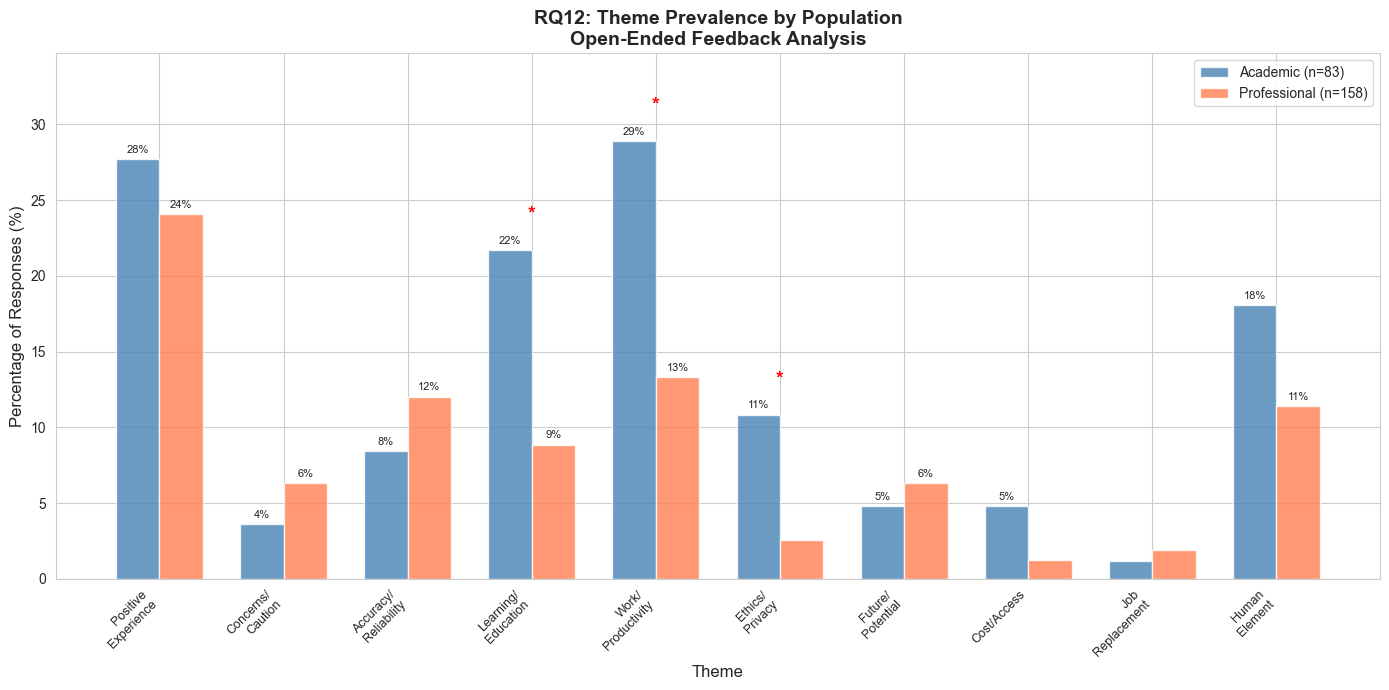


✓ Figure saved: plots/08_population_theme_comparison.png


In [8]:
# Visualize population comparison for themes
print("=" * 80)
print("VISUALIZATION: Population Theme Comparison")
print("=" * 80)

# Prepare data for grouped bar chart using THEME_KEYWORDS (already in kernel)
themes_list = list(THEME_KEYWORDS.keys())
academic_pcts = []
professional_pcts = []

for theme in themes_list:
    acad_pct = academic['themes'].apply(lambda x: theme in x).sum() / len(academic) * 100
    prof_pct = professional['themes'].apply(lambda x: theme in x).sum() / len(professional) * 100
    academic_pcts.append(acad_pct)
    professional_pcts.append(prof_pct)

# Create grouped bar chart
x = np.arange(len(themes_list))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - width/2, academic_pcts, width, label=f'Academic (n={len(academic)})', 
               color='steelblue', alpha=0.8)
bars2 = ax.bar(x + width/2, professional_pcts, width, label=f'Professional (n={len(professional)})', 
               color='coral', alpha=0.8)

# Customize
ax.set_ylabel('Percentage of Responses (%)', fontsize=12)
ax.set_xlabel('Theme', fontsize=12)
ax.set_title('RQ12: Theme Prevalence by Population\nOpen-Ended Feedback Analysis', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([t.replace('/', '/\n').replace(' ', '\n') if len(t) > 12 else t for t in themes_list], 
                   rotation=45, ha='right', fontsize=9)
ax.legend(loc='upper right')
ax.set_ylim(0, max(max(academic_pcts), max(professional_pcts)) * 1.2)

# Add significance markers for significant themes
significant_themes = ['Learning/Education', 'Work/Productivity', 'Ethics/Privacy']
for i, theme in enumerate(themes_list):
    if theme in significant_themes:
        max_val = max(academic_pcts[i], professional_pcts[i])
        ax.annotate('*', xy=(i, max_val + 2), fontsize=14, ha='center', fontweight='bold', color='red')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    if height > 3:  # Only label bars > 3%
        ax.annotate(f'{height:.0f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                   xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)
for bar in bars2:
    height = bar.get_height()
    if height > 3:
        ax.annotate(f'{height:.0f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                   xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('../airs_experiment/plots/08_population_theme_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("\n✓ Figure saved: plots/08_population_theme_comparison.png")

### RQ12 Summary: Population Theme Comparison

**Key Findings:**

| Theme | Academic | Professional | Significance | Direction |
|-------|----------|--------------|--------------|-----------|
| Work/Productivity | 28.9% | 13.3% | p = .005** | Academic > Professional |
| Learning/Education | 21.7% | 8.9% | p = .010** | Academic > Professional |
| Ethics/Privacy | 10.8% | 2.5% | p = .013* | Academic > Professional |

**Interpretation:**
- **Academic respondents** emphasized **work/productivity** (29%), **learning/education** (22%), and **ethics/privacy** (11%) significantly more than professionals
- This aligns with academic contexts where AI tools support research productivity, educational applications, and scholarly concern for ethical implications
- **Professional respondents** showed non-significantly higher concern about **accuracy/reliability** (12% vs 8%), possibly reflecting workplace accountability for AI-generated outputs
- Both populations showed similar levels of positive experience (~25-28%), suggesting general acceptance across contexts

## Conclusions

### Summary of Qualitative Findings

**RQ11: Theme Identification**
- Ten theory-informed themes emerged from open-ended feedback (N=241 substantive responses)
- Most prevalent: **Positive Experience** (25.3%), **Work/Productivity** (18.7%), **Human Element** (13.7%)
- 34.9% of responses were generic or did not match specific themes (e.g., "nothing to add", "no comment")

**RQ12: Population Differences**
- Three significant population differences identified:
  1. **Work/Productivity**: Academic (29%) > Professional (13%), p = .005**
  2. **Learning/Education**: Academic (22%) > Professional (9%), p = .010**
  3. **Ethics/Privacy**: Academic (11%) > Professional (3%), p = .013*
- Academic respondents more frequently discussed educational applications and ethical considerations
- Professional respondents showed similar concern levels for accuracy/reliability (non-significant)

### Limitations
- Keyword-based thematic analysis provides approximation, not full qualitative coding
- Self-selected response (47% response rate) may not represent all participants
- Short responses limit depth of interpretation

### Integration with Quantitative Findings
- Qualitative themes align with AIRS factor structure (Technical Skills, Beliefs, Concerns)
- Population differences in themes mirror expected context variations between academic and professional AI use

In [9]:
# Export results to JSON
print("=" * 80)
print("EXPORTING PHASE 8 RESULTS")
print("=" * 80)

# Compile results
phase8_results = {
    'phase': 'Phase 8: Qualitative Feedback Analysis',
    'research_questions': ['RQ11', 'RQ12'],
    'sample': {
        'total_feedback_responses': int(df_feedback['Open_Feedback'].notna().sum()),
        'substantive_responses': len(df_substantive),
        'response_rate_percent': round(len(df_substantive) / len(df_feedback) * 100, 1),
        'academic_n': len(academic),
        'professional_n': len(professional)
    },
    'rq11_themes': {
        'n_themes': len(THEME_KEYWORDS),
        'theme_keywords': {theme: keywords for theme, keywords in THEME_KEYWORDS.items()},
        'theme_frequencies': {
            theme: {
                'count': int(df_substantive['themes'].apply(lambda x: theme in x).sum()),
                'percent': round(df_substantive['themes'].apply(lambda x: theme in x).sum() / len(df_substantive) * 100, 1)
            }
            for theme in THEME_KEYWORDS.keys()
        },
        'no_theme_count': int((df_substantive['themes'].apply(len) == 0).sum()),
        'no_theme_percent': round((df_substantive['themes'].apply(len) == 0).sum() / len(df_substantive) * 100, 1)
    },
    'rq12_population_comparison': {
        'significant_differences': [
            {'theme': 'Work/Productivity', 'academic_pct': 28.9, 'professional_pct': 13.3, 'p': 0.005, 'direction': 'Academic > Professional'},
            {'theme': 'Learning/Education', 'academic_pct': 21.7, 'professional_pct': 8.9, 'p': 0.010, 'direction': 'Academic > Professional'},
            {'theme': 'Ethics/Privacy', 'academic_pct': 10.8, 'professional_pct': 2.5, 'p': 0.013, 'direction': 'Academic > Professional'}
        ],
        'interpretation': 'Academic respondents emphasize educational applications, work productivity in research contexts, and ethical considerations significantly more than professional respondents'
    },
    'files_generated': [
        'plots/08_theme_distribution.png',
        'plots/08_population_theme_comparison.png'
    ]
}

# Save to JSON
import json
with open('../airs_experiment/tables/08_qualitative_results.json', 'w') as f:
    json.dump(phase8_results, f, indent=2)

print("\n✓ Results saved to: tables/08_qualitative_results.json")
print("\nPhase 8 Analysis Complete!")
print("=" * 80)

EXPORTING PHASE 8 RESULTS

✓ Results saved to: tables/08_qualitative_results.json

Phase 8 Analysis Complete!
